### Check the lakes in the HMA basins.

In [1]:
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.patches as mpatches


In [2]:
path_basins_lehner2013_l4 = 'data/hma-extent/basins/hma_Lehner2013_levels/hma_hybas_as_lev04_v1c.gpkg' 
path_hma_gtng = 'data/hma-extent/HMA/hma_gtng_202307_subregions.gpkg'
path_hma_basin_lakes = 'data/water-extent/lakes/HydroLakes_v10_hma_basin.gpkg'
path_hma_basin_lakes_stats = 'data/water-extent/lakes/HydroLakes_v10_hma_basin_stats.gpkg'


In [3]:
hma_gtng = gpd.read_file(path_hma_gtng).dissolve()
hma_lakes = gpd.read_file(path_hma_basin_lakes)
hma_basins_lehner2013_l4 = gpd.read_file(path_basins_lehner2013_l4)
hma_basin_lake_stat = gpd.read_file(path_hma_basin_lakes_stats)
hma_basins_lehner2013_l4.head(2)


,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry
0,4040627620,4040007850,4040007850,4040007850,1200.7,1200.7,135139.6,135139.6,4322,0,0,2,32,"MULTIPOLYGON (((108.87917 36.61667, 108.88138 ..."
1,4040548370,4040603570,4040007850,4040007850,1553.3,1553.3,248039.1,441119.7,4327,0,0,1,35,"MULTIPOLYGON (((108.95833 39.675, 108.95777 39..."


Text(0.5, 1.0, 'lakes in hma basins')

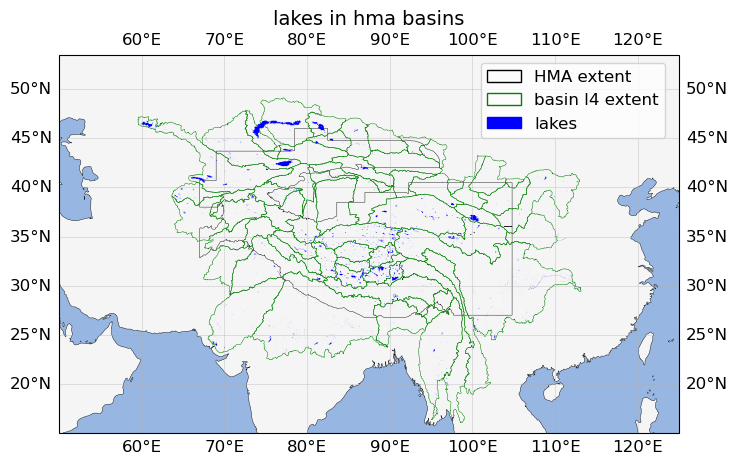

In [4]:
plt.rcParams.update({'font.size':12})
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([50.0, 125.0, 15, 47.0])
# ax.set_extent([65.0, 107.0, 24.0, 46.0])
## add region boundaries
hma_gtng.plot(ax=ax, edgecolor='black', facecolor='none', linestyle='-', linewidth=0.3)
hma_basins_lehner2013_l4.plot(ax=ax, edgecolor='green', facecolor='none', linewidth=0.3)

## add lake boundaries
hma_lakes.plot(ax=ax, facecolor='blue',  alpha=1)

## add auxiliary features
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, edgecolor='black')

## add legend and gridlines
legend_patches = [
    mpatches.Patch(edgecolor='black', facecolor='none', label='HMA extent', linewidth=1),
    mpatches.Patch(edgecolor='green', facecolor='none', label='basin l4 extent', linewidth=1),
    mpatches.Patch(edgecolor='blue', facecolor='blue', label='lakes', linewidth=1)
]
ax.legend(handles=legend_patches, loc=(0.68, 0.78))
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)
ax.set_title('lakes in hma basins', fontsize=14)
# fig.savefig('figures/water-extent/hma_basin_lake_map.png', dpi=200, bbox_inches='tight')


Text(0.5, 1.0, 'Lake area in hma basins')

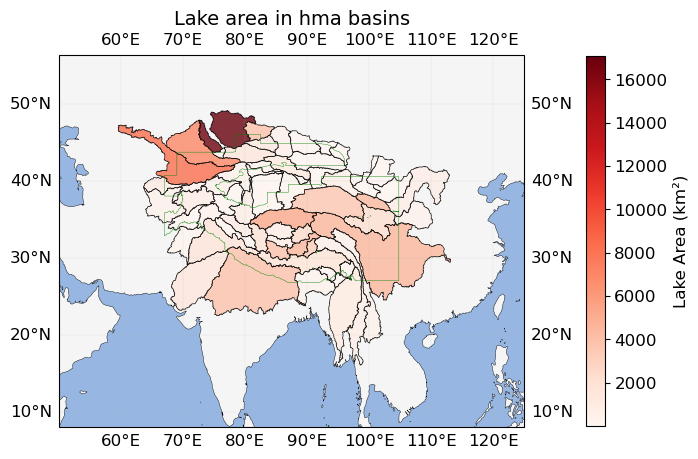

In [5]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([50.0, 125.0, 8, 50.0])
### add lake statistics
hma_basin_lake_stat.plot(ax=ax, 
                         column='lake_area', 
                         cmap='Reds', 
                         legend=True,
                         legend_kwds={'label': "Lake Area (km²)", 'shrink': 0.6, 'pad': 0.1},
                         edgecolor='black', 
                         linewidth=0.5, 
                         alpha=0.8)
## add region boundaries
hma_gtng.plot(ax=ax, edgecolor='green', facecolor='none', linestyle='-', linewidth=0.3)
## add auxiliary features
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, edgecolor='black')
ax.gridlines(draw_labels=True, linewidth=0.2, alpha=0.5, zorder=1)
ax.set_title('Lake area in hma basins', fontsize=14)
# fig.savefig('figures/water-extent/hma_basin_lake_area_map.png', dpi=200, bbox_inches='tight')


Text(0.5, 1.0, 'Lake number in hma basins')

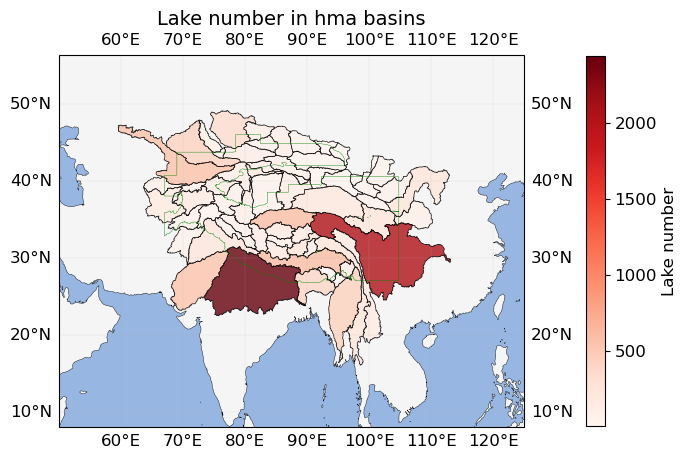

In [6]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([50.0, 125.0, 8, 50.0])
## add lake statistics
hma_basin_lake_stat.plot(ax=ax, 
                         column='lake_count', 
                         cmap='Reds', 
                         legend=True,
                         legend_kwds={'label': "Lake number", 'shrink': 0.6, 'pad': 0.1},
                         edgecolor='black', 
                         linewidth=0.5, 
                         alpha=0.8)

## add region boundaries
hma_gtng.plot(ax=ax, edgecolor='green', facecolor='none', linestyle='-', linewidth=0.3)

## add auxiliary features
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, linewidth=0.3, edgecolor='black')
ax.gridlines(draw_labels=True, linewidth=0.2, alpha=0.5, zorder=1)
ax.set_title('Lake number in hma basins', fontsize=14)
# fig.savefig('figures/water-extent/hma_basin_lake_number_map.png', dpi=200, bbox_inches='tight')


Text(0, 0.5, 'Lake Area (km²)')

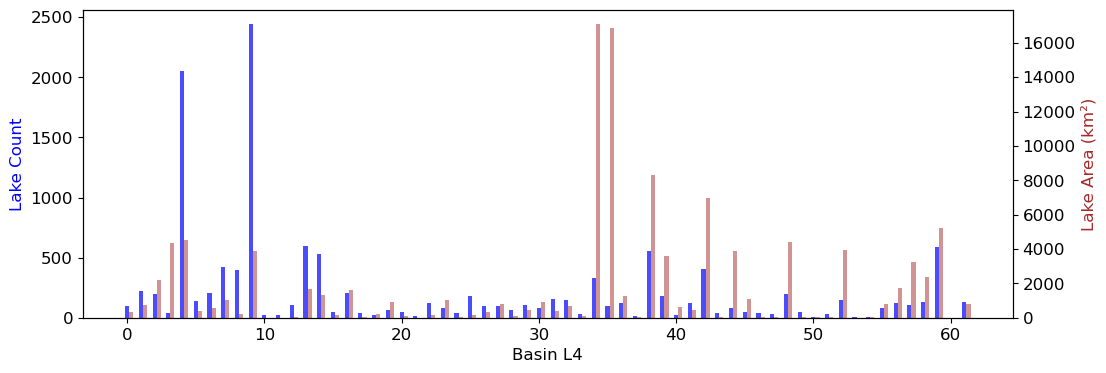

In [13]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x=hma_basin_lake_stat.index, 
       height=hma_basin_lake_stat['lake_count'], 
       width=0.3, 
       color='blue', 
       alpha=0.7)
ax2 = ax.twinx()
ax2.bar(x=hma_basin_lake_stat.index+0.3, 
        height=hma_basin_lake_stat['lake_area'], 
        width=0.3, 
        color='Brown', 
        alpha=0.5)
ax.set_xlabel('Basin L4')
ax.set_ylabel('Lake Count', color='blue')
ax2.set_ylabel('Lake Area (km²)', color='Brown')
# fig.savefig('figures/water-extent/hma_basin_lake_stat_bar.png', dpi=200, bbox_inches='tight')
